In [33]:
import scipy.io
import import_ipynb

import matplotlib.pyplot as plt
import numpy as np

from scipy import signal

In [34]:
import upload2SoC_py

In [35]:
## comtrol part
MP_enable = 1
GMP_enable = 1

In [36]:
## loaidng data
# we may have multiple iteration, specify it, variables names are the same as variables_name
Iter = 0

# in jupyter '../../SampleData/18_Nov_2021_11_31_16_+0100_itersdata.mat'
# in normal python '/SampleData/18_Nov_2021_11_31_16_+0100_itersdata.mat'
variables_name = ['Efficiency', 'ACPR', 'Power', 'NMSE', 'EVM', 'uBB_CFR', 'uBB', 'yBB', 'xBB' , 'y_simb']
mat = scipy.io.loadmat('../../SampleData/18_Nov_2021_11_31_16_+0100_itersdata.mat')
input_data = [mat['itersdata'][0]['Efficiency'],
              mat['itersdata'][0]['ACPR'],
              mat['itersdata'][0]['Power'],
              mat['itersdata'][0]['NMSE'],
              mat['itersdata'][0]['EVM'],
              mat['itersdata'][0]['uBB_CFR'],
              mat['itersdata'][0]['uBB'],
              mat['itersdata'][0]['yBB'],
              mat['itersdata'][0]['xBB'],
              mat['itersdata'][0]['y_simb']
              ]
item = zip(variables_name, input_data)
d = dict(item)
create_var = locals()
create_var.update(d)

In [37]:
## Memory Polynomial
def MemoryPolynomial(uBB, M, P):
    i=0
    U = np.zeros((len(uBB), (M+1)*(P+1)), dtype=complex)
    for m in range(0, M+1):
        for p in range(0, P+1):
            # U[:, i] = np.ones((len(uBB)), dtype=complex)
            # a = (np.roll(uBB,m)*pow(abs(np.roll(uBB,m)),p))
            U[:, [i]] = (np.roll(uBB,m)*pow(abs(np.roll(uBB,m)),p))
            # print(a.shape)
            # print(U[:, [i]].shape)
            i = i+1
    return U


In [38]:
## implement the MP
if(MP_enable):
    U = MemoryPolynomial(uBB[Iter], 5, 3)
    w = np.dot(np.linalg.pinv(U), yBB[Iter])
    # print(U)
    # print(U.shape)
    yest = np.dot(U, w)
    print(yest.shape)
    yest.resize((153600, ))
    print(yest.shape)

y1 = yBB[Iter]
y1.resize((153600, ))
print(y1.shape)


(153600, 1)
(153600,)
(153600,)


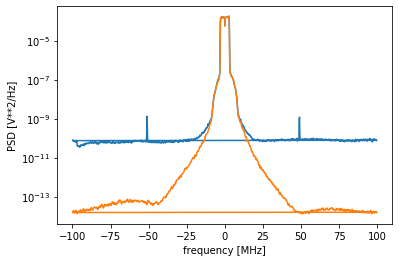

In [39]:
# def w2db(Pxx_den):
#     for i in range(Pxx_den.size):
#         Pxx_den[i] = 20*math.log10(Pxx_den[i])
#     return Pxx_den

fs = 200e6
f, Pxx_den = signal.welch(y1, fs, return_onesided=False, nperseg=1024, scaling='spectrum')
plt.semilogy(f/1e6, Pxx_den)

f, Pxx_den = signal.welch(yest, fs, return_onesided=False, nperseg=1024, scaling='spectrum')
plt.semilogy(f/1e6, Pxx_den)


# # plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [MHz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [40]:
## implement the GMP
def GMP(uBB, M, P, L):
    a = 1
    b = 1
